In [1]:
from astropy.io import fits
import numpy as np
import os.path
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.gridspec as gridspec
import aplpy
import pandas as pd
from photutils import SkyCircularAperture
from photutils import aperture_photometry
%matplotlib inline

In [12]:
path = '/Users/justin/Documents/Master_Thesis/softwares/eazy/inputs/OUTPUT/photz.zout'
cat = pd.read_csv(path, delim_whitespace=True, header=None, names=['ID', 'z_spec', 'z_a','f','chi2','l1','u1','l2','u2','l3','u3','3f','s2s','gt4','4f','bt'], skiprows=[0,1])
print(len(cat))
for i in range(len(cat)):
    if cat['z_a'][i]>4:
        print(cat['ID'][i], cat['z_a'][i], cat['chi2'][i], cat['l3'][i])



112
101 7.579 0.001640334 1.01
195 10.913 0.06207442 0.509
387 6.031 11.68965 3.036
392 6.101 7.012554 1.215
397 7.244 33.55225 6.845
433 4.268 5.049237 3.226
490 4.592 7.400844 2.813
527 4.996 4.001101 2.866
546 10.913 0.5610443 0.471
622 10.913 2.687793 2.947
640 6.031 0.7917983 3.666
662 4.428 4.550895 0.75
670 9.572 12.85261 2.092
714 5.177 2.242354 3.822


In [3]:
ra=53.1716057
dec=27.8207884
sign=-1
from utilities import ra2hms, dec2dms
a=ra2hms(ra)
b=dec2dms(sign, dec)

3h32m41.18536800000058
-27°49m14.8382400000051


In [4]:
logfx=-16.60
fx=10**logfx
print(fx)

2.5118864315095718e-17


In [31]:
ra=53.2461914 
dec=-27.8618165
dist=9999.
raa=0
deec=0
n=0
for i in range(len(big_table)):
    if ((ra-big_table.field('RA')[i])**2+(dec-big_table.field('DEC')[i])**2)**0.5 < dist:
        dist = ((ra-big_table.field('RA')[i])**2+(dec-big_table.field('DEC')[i])**2)**0.5
        raa = (ra-big_table.field('RA')[i])
        deec = (dec-big_table.field('DEC')[i])
        n = i
print(dist*3600, raa*3600, deec*3600, n)
#for i in range(len(big_table)):
    #print(big_table.field('ID')[i],big_table.field('RA')[i],big_table.field('DEC')[i],big_table.field('Phot_z')[i])
path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_4ms/4Ms_Chandra_deg.fits'
cat4 = fits.open(path)[1].data
#print(cat4.columns) #12-20 are full, soft and hard counts (c, u, l error)
#for i in range(len(cat4)):
    #print(cat4.field('col1')[i], cat4.field('RA_deg')[i], cat4.field('DEC_deg')[i], 5.)

2.72162430942 1.19304 -2.4462 928


source  527
P(z) normalization constant:  0.134482817962
z_phot:  4.996
l3:  2.869963 + 0.038316 - 0.0387
l2:  3.232522 + 0.041906 - 0.042325
l1:  4.482201 + 0.05428 - 0.054822
EAZY: l1, l2 and l3:  4.502 3.24 2.866


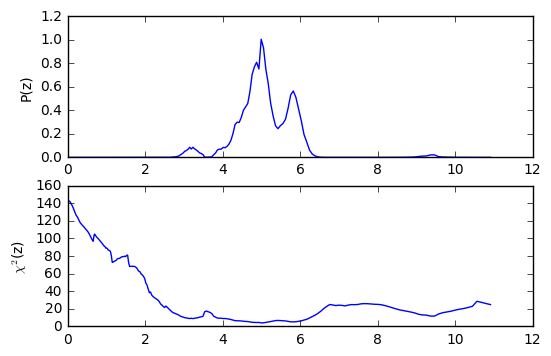

In [13]:
path = '/Users/justin/Documents/Master_Thesis/softwares/eazy/inputs/OUTPUT/photz.zout'
cat_z = pd.read_csv(path, delim_whitespace=True, header=None, names=['ID', 'z_spec', 'z_a','f','chi2','l1','u1','l2','u2','l3','u3','3f','s2s','gt4','4f','bt'], skiprows=[0,1])
n=527
print('source ', n)
               
path_sed = '/Users/justin/Documents/Master_Thesis/softwares/eazy/inputs/OUTPUT/photz_' + str(n) + '.temp_sed'
path_flx = '/Users/justin/Documents/Master_Thesis/softwares/eazy/inputs/OUTPUT/photz_' + str(n) + '.obs_sed'
path_chi = '/Users/justin/Documents/Master_Thesis/softwares/eazy/inputs/OUTPUT/photz_' + str(n) + '.pz'
cat_sed = pd.read_csv(path_sed, delim_whitespace=True, header=None, names=['Wavelength', 'Flux'], skiprows=[0,1])
cat_flx = pd.read_csv(path_flx, delim_whitespace=True, header=None, names=['Wavelength', 'FluxCat', 'FluxErrCat', 'FluxErrTot', 'FluxTemp'], skiprows=1)
cat_chi = pd.read_csv(path_chi, delim_whitespace=True, header=None, names=['z', 'Chi^2'], skiprows=1)

p_z=np.zeros(len(cat_chi))
for i in range(len(cat_chi)):
    p_z[i]=np.exp(-(cat_chi['Chi^2'][i])/2.)

const=np.trapz(p_z,cat_chi['z'])
print('P(z) normalization constant: ', const)
for i in range(len(cat_chi)):
    p_z[i]=p_z[i]/const

f=plt.figure()
ax=f.add_subplot(211)
plt.plot(cat_chi['z'],p_z)
plt.ylabel('P(z)')
ax2=f.add_subplot(212)
plt.plot(cat_chi['z'],cat_chi['Chi^2'])
plt.ylabel('$\chi^2$(z)')

for i in range(len(cat_z)):
    if cat_z['ID'][i]==n:
        z=cat_z['z_a'][i]
        print('z_phot: ', z)
        z_l1=cat_z['l1'][i]
        z_u1=cat_z['u1'][i]
        z_l2=cat_z['l2'][i]
        z_u2=cat_z['u2'][i]
        z_l3=cat_z['l3'][i]
        z_u3=cat_z['u3'][i]
        
alpha=[0.6827,0.9545,0.9973]
int=0.
integral=0
integralnext=(cat_chi['z'][1]-cat_chi['z'][0])*(p_z[1]+p_z[0])/2.
for i in range(len(cat_chi)-2):
    integral += (cat_chi['z'][i+1]-cat_chi['z'][i])*(p_z[i+1]+p_z[i])/2.
    integralnext += (cat_chi['z'][i+2]-cat_chi['z'][i+1])*(p_z[i+2]+p_z[i+1])/2.
    if (integral < (1-alpha[0])/2) & (integralnext > (1-alpha[0])/2):
        print('l1: ', cat_chi['z'][i+1], '+', cat_chi['z'][i+1]-cat_chi['z'][i], '-', cat_chi['z'][i+2]-cat_chi['z'][i+1])
    if (integral < (1-alpha[1])/2) & (integralnext > (1-alpha[1])/2):
        print('l2: ', cat_chi['z'][i+1], '+', cat_chi['z'][i+1]-cat_chi['z'][i], '-', cat_chi['z'][i+2]-cat_chi['z'][i+1])
    if (integral < (1-alpha[2])/2) & (integralnext > (1-alpha[2])/2):
        print('l3: ', cat_chi['z'][i+1], '+', cat_chi['z'][i+1]-cat_chi['z'][i], '-', cat_chi['z'][i+2]-cat_chi['z'][i+1])
        
print('EAZY: l1, l2 and l3: ', z_l1, z_l2, z_l3)

    

In [11]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font
plt.font_manager.findfont(matplotlib.font_manager.FontProperties(family=font))

AttributeError: module 'matplotlib.pyplot' has no attribute 'font_manager'